In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
df=pd.read_csv('/Users/kimjuhwan/Desktop/data/iris/iris_data.txt', header=None)
df.columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df = df.drop(columns=['class'], axis=1)
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df.isna().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
dtype: int64

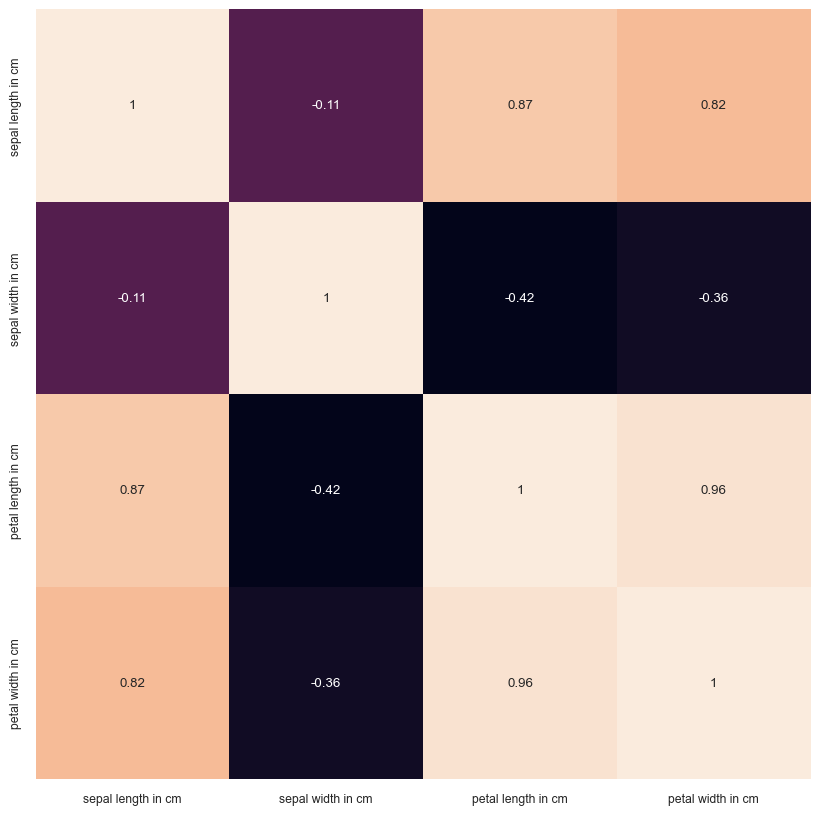

In [9]:
data_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [15]:
y=df['petal width in cm'].values
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [16]:
x_df=df.drop('petal width in cm',axis=1)
x=(x_df-np.min(x_df)/(np.max(x_df)-np.min(x_df)))
x

/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(ax

,sepal length in cm,sepal width in cm,petal length in cm
0,3.905556,2.666667,1.230508
1,3.705556,2.166667,1.230508
2,3.505556,2.366667,1.130508
3,3.405556,2.266667,1.330508
4,3.805556,2.766667,1.230508
...,...,...,...
145,5.505556,2.166667,5.030508
146,5.105556,1.666667,4.830508
147,5.305556,2.166667,5.030508
148,5.005556,2.566667,5.230508


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=423)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print(clf_dt.score(x_train, y_train))

0.999584199103949


In [21]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.3331666249791536


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

pred_rf = rf_clf.predict(x_test)

print(rf_clf.score(x_train, y_train))

0.9929461069482176


In [23]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.24443157464858234


In [24]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print(clf_lr.score(x_train, y_train))

0.9402315527525301


In [25]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차',mse)

평균제곱근오차 0.18848521494159057


In [26]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print(clf_svm.score(x_train, y_train))

0.9524551173217223


In [27]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.17875254474025734
